In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [3]:
# x - расходы на рекламу за 5 месяцев
# Y - объем продаж за эти 5 месяцев
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])

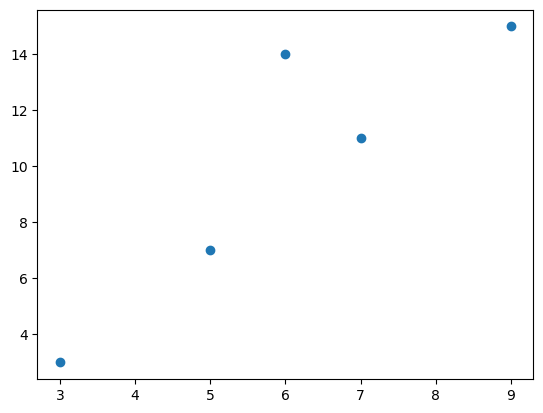

In [4]:
plt.scatter(x, Y)

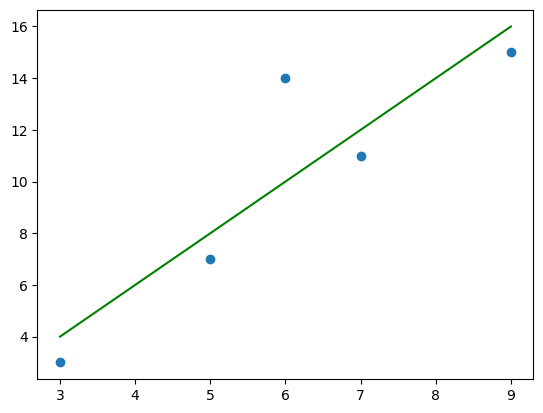

In [7]:
xx = np.array([3, 9])
a0, a1 = -2, 2
YY = a0 + a1 * xx
plt.scatter(x, Y)
plt.plot(xx, YY, 'g')
plt.show()

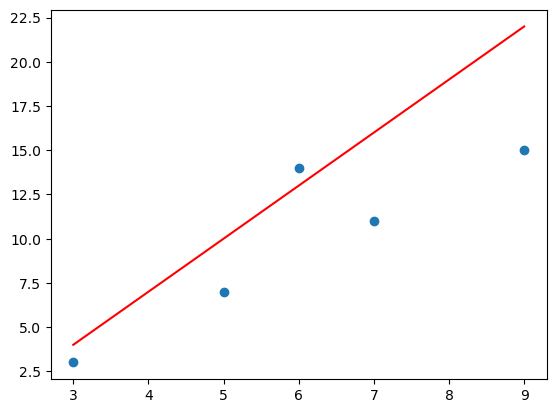

In [8]:
xx = np.array([3, 9])
a0, a1 = -5, 3
YY = a0 + a1 * xx
plt.scatter(x, Y)
plt.plot(xx, YY, 'r')
plt.show()

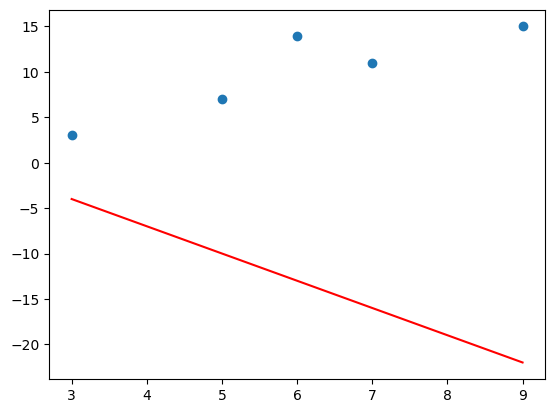

In [9]:
xx = np.array([3, 9])
a0, a1 = 5, -3
YY = a0 + a1 * xx
plt.scatter(x, Y)
plt.plot(xx, YY, 'r')
plt.show()

$$ MAE = Mean  Absolute  Error = \frac{\sum_{i=1}^n{|Y_i - \hat{Y}_i|}}{n} -> min$$
$\hat{Y}_i = a_0 + a_1x_i$ - прогноз $Y$ без учета влияния на него всех факторов, кроме $x$

$$ MAE = Mean  Absolute  Error = \frac{\sum_{i=1}^n{|Y_i - a_0 - a_1x_i|}}{n} -> min$$

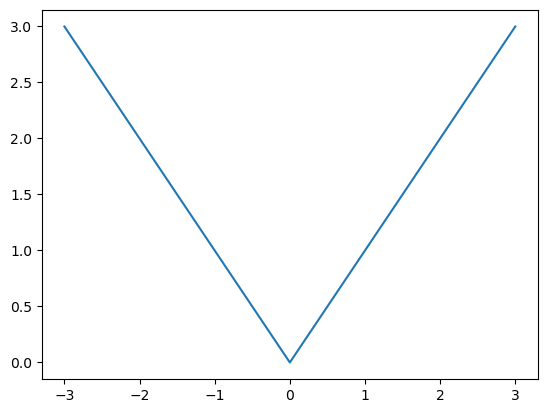

In [13]:
ss = np.linspace(-3, 3, 21)
abs_ss = np.abs(ss)
plt.plot(ss, abs_ss)

$$ MAE = Mean Square Error = \frac{\sum_{i=1}^n{\left(Y_i - \hat{Y}_i\right)^2}}{n} -> min$$
$\hat{Y}_i = a_0 + a_1x_i$ - прогноз $Y$ без учета влияния на него всех факторов, кроме $x$

$$ MSE = Mean Square Error = \frac{\sum_{i=1}^n{\left(Y_i - a_0 - a_1x_i\right)^2}}{n} -> min$$

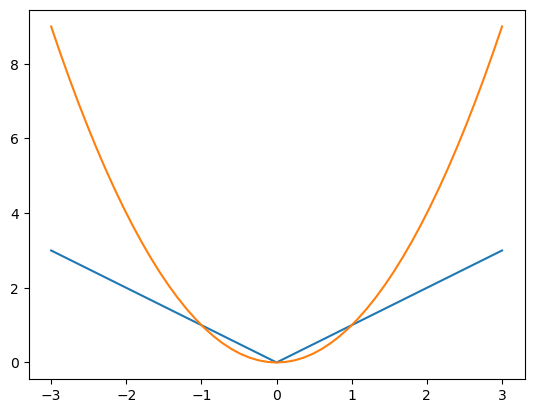

In [15]:
ss = np.linspace(-3, 3, 51)
abs_ss = np.abs(ss)
ss2 = ss**2
plt.plot(ss, abs_ss)
plt.plot(ss, ss2)
plt.show()

### Лабораторная работа
Загрузите файл Video Games.csv (с помощью pd.read_csv). 

Для 11 703 компьютерных игр известны платформа, год выхода, жанр, платформа, издатель, объемы продаж игры - отдельно для Северной Америки, Европы, Японии и других регионов.

В обучающей выборке для каждой игры известны следующие поля:

Name — название игры;
Platform — платформа (PC; DS; GBA; PS; PS2; PS3; PSP; Wii; XB или X360);
Year_of_Release — год выпуска;
Genre — жанр (Action; Adventure; Fighting; Platform; Puzzle; Racing; Role-Playing; Shooter; Simulation; Sports или Strategy; Misc означает все остальные жанры);
Publisher — издатель;
NA_Sales — объемы продаж игры в Северной Америке (в млн долл. США);
EU_Sales — объемы продаж игры в Европе(в млн долл. США);
Other_Sales — объемы продаж игры в других регионах (в млн долл. США);
Critic_Score — сумма оценок, данных игре штатными критиками сайта Metacritic;
Critic_Count — количество штатных критиков, давших оценки игре;
User_Score — сумма оценок, данных игре игры пользователями сайта Metacritic;
User_Count — количество пользователей, давших оценки;
Developer — разработчик;
Rating — рейтинг игры (AO — только для взрослых; 18+ M — только для лиц старше 18 лет; 17+ — только для лиц старше 17 лет; E10+ — для всех старше 10 лет; E — для всех; EC — для детей младшего возраста; RP — рейтинг не присвоен);
JP_Sales — объемы продаж игры в Японии (в млн долл. США).

Требуется построить модель, предсказывающую объем продаж игры в Японии. 

Япония - достаточно специфичная страна с точки зрения индустрии развлечений. К тому же государство активно защищает своих производителей, что не способствует импорту. Перед издателями компьютерных игр всегда стоит вопрос: стоит ли игру переводить, подгонять под местный менталитет и платить для входа на японский рынок. Чтобы это понять, следует оценить, на какой кусок пирога можно вообще в Японии рассчитывать. Один из вариантов это сделать – по истории продаж в других регионах. Если игра еще в разработке, за историю продаж можно считать прогнозы: Европа и Америка не такие непредсказуемые рынки, как Япония.

Выберите в качестве результативного признака JP_Sales. В качестве факторных признаков выберите все числовые признаки. Также можно для категориальных признаков (Platform, Genre, возможно, Publisher) ввести индикаторы (с помощью sklearn.preprocessing.OneHotEncoder).

На основе класса SimpleRegression (в котором x - это одномерный массив значений факторного признака) создайте класс MultipleRegression, который реализует градиентный спуск для случая, когда x является многомерным массивом, содержащим в каждой строке (для кафдой компьютерной игры) значения нескольких факторных признаков.

Обучите модель с помощью метода MultipleRegression.fit, дайте прогнозы JP_Sales^ для каждой игры с помощью MultipleRegression.predict, вычислите ошибки MAE и MAPE.

Попробуйте расширить набор факторных признаков, добавив логарифмы, квадраты, кубы

In [16]:
data = pd.read_csv(r'C:\Users\visol\YandexDisk\Документы\Диджитализация банков и финтех\Files\Video_Games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,0.00,NaN,NaN,NaN,NaN,Sand Grain Studios,E
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,0.32,84.0,70.0,8.1,733.0,Nintendo,E
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,0.05,53.0,6.0,6.0,8.0,Eurocom Entertainment Software,E
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,0.01,NaN,NaN,NaN,NaN,NaN,NaN
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.shape

(11703, 15)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11703 entries, 0 to 11702
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             11702 non-null  object 
 1   Platform         11703 non-null  object 
 2   Year_of_Release  11508 non-null  float64
 3   Genre            11702 non-null  object 
 4   Publisher        11665 non-null  object 
 5   NA_Sales         11703 non-null  float64
 6   EU_Sales         11703 non-null  float64
 7   JP_Sales         11703 non-null  float64
 8   Other_Sales      11703 non-null  float64
 9   Critic_Score     5676 non-null   float64
 10  Critic_Count     5676 non-null   float64
 11  User_Score       5319 non-null   float64
 12  User_Count       5319 non-null   float64
 13  Developer        7064 non-null   object 
 14  Rating           6957 non-null   object 
dtypes: float64(9), object(6)
memory usage: 1.3+ MB


In [19]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,11508.000000,11703.000000,11703.000000,11703.000000,11703.000000,5676.000000,5676.000000,5319.000000,5319.000000
mean,2006.519465,0.269527,0.147226,0.079129,0.047640,69.057787,26.496124,7.132995,158.593345
std,5.922082,0.887505,0.527578,0.319529,0.189604,13.959621,18.998469,1.492816,515.113357
min,1980.000000,0.000000,0.000000,0.000000,0.000000,17.000000,4.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,22.000000,7.500000,25.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,80.000000,37.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,98.000000,107.000000,9.600000,9629.000000


In [21]:
Y = data.JP_Sales
x = data.drop(['JP_Sales'], axis = 1)

In [23]:
x.Name.nunique()

8780

In [24]:
x.Developer.nunique()

1467

In [32]:
x = x.drop(['Name'], axis = 1)


In [36]:
pd.get_dummies(x['Platform']).astype(int)

,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
pd.get_dummies(x[['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']], drop_first = True).astype(int)

,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
x = pd.concat([x, pd.get_dummies(x[['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']], drop_first = True).astype(int)], axis = 1)

In [43]:
x.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
1,WiiU,2012.0,Platform,Nintendo,2.30,1.34,0.32,84.0,70.0,8.1,...,0,0,0,1,0,0,0,0,0,0
2,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.05,53.0,6.0,6.0,...,0,0,0,1,0,0,0,0,0,0
3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.01,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.00,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [44]:
x = x.drop(['Platform', 'Genre', 'Publisher', 'Developer', 'Rating'], axis = 1)
x.head()

,Year_of_Release,NA_Sales,EU_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_3DO,Platform_3DS,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,0.04,0.00,0.00,NaN,NaN,NaN,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2012.0,2.30,1.34,0.32,84.0,70.0,8.1,733.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2005.0,0.18,0.14,0.05,53.0,6.0,6.0,8.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2002.0,0.00,0.00,0.01,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
x = x.fillna(-10)
x.head()

,Year_of_Release,NA_Sales,EU_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_3DO,Platform_3DS,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,0.04,0.00,0.00,-10.0,-10.0,-10.0,-10.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2012.0,2.30,1.34,0.32,84.0,70.0,8.1,733.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2005.0,0.18,0.14,0.05,53.0,6.0,6.0,8.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2002.0,0.00,0.00,0.01,-10.0,-10.0,-10.0,-10.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006.0,0.00,0.00,0.00,-10.0,-10.0,-10.0,-10.0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

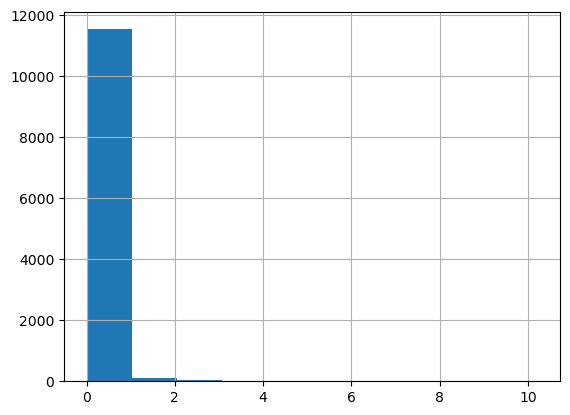

In [59]:
Y.hist()

(array([1.0906e+04, 4.8900e+02, 1.5000e+02, 8.1000e+01, 3.1000e+01,
        2.0000e+01, 1.7000e+01, 5.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([0.        , 0.24176979, 0.48353958, 0.72530937, 0.96707916,
        1.20884895, 1.45061874, 1.69238853, 1.93415832, 2.17592811,
        2.4176979 ]),
 <BarContainer object of 10 artists>)

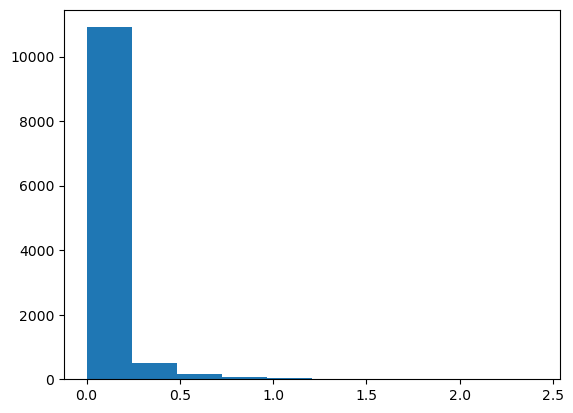

In [61]:
plt.hist(np.log1p(Y))

(array([1.0074e+04, 1.0770e+03, 3.4200e+02, 1.2800e+02, 4.1000e+01,
        2.0000e+01, 1.2000e+01, 5.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([0.        , 0.37462045, 0.7492409 , 1.12386136, 1.49848181,
        1.87310226, 2.24772271, 2.62234316, 2.99696362, 3.37158407,
        3.74620452]),
 <BarContainer object of 10 artists>)

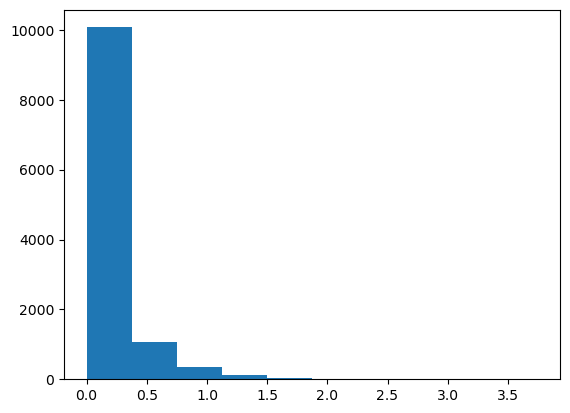

In [62]:
plt.hist(np.log1p(x.NA_Sales))

<Axes: >

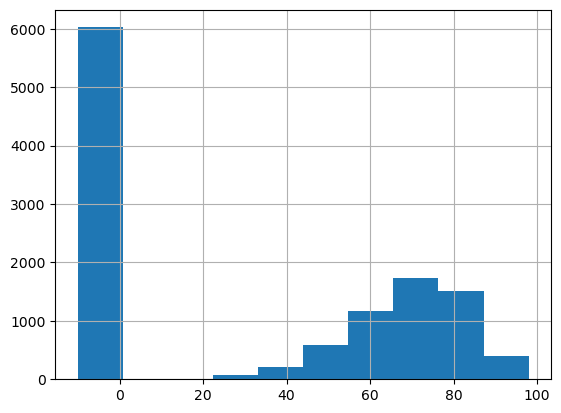

In [63]:
x.Critic_Score.hist()

In [66]:
x.Year_of_Release = (x.Year_of_Release - x.Year_of_Release.mean()) / x.Year_of_Release.std()
x.head()

,Year_of_Release,NA_Sales,EU_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_3DO,Platform_3DS,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,0.128121,0.04,0.00,0.00,-10.0,-10.0,-10.0,-10.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.151359,2.30,1.34,0.32,84.0,70.0,8.1,733.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.124248,0.18,0.14,0.05,53.0,6.0,6.0,8.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.112629,0.00,0.00,0.01,-10.0,-10.0,-10.0,-10.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.128121,0.00,0.00,0.00,-10.0,-10.0,-10.0,-10.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
def train_test_split(x, Y, test_size = 0.2, random_state = None):
    if random_state is not None:
        np.random.seed(random_state)
    data = pd.concat([x, Y], axis = 1)
    shuffled_indices = np.random.permutation(len(Y))
    n_tests = int(test_size * len(Y))
    test_indices = shuffled_indices[:n_tests]
    train_indices = shuffled_indices[n_tests:]
    data_train, data_test = data.iloc[train_indices, :], data.iloc[test_indices, :]
    return data_train.iloc[:, :-1], data_test.iloc[:, :-1], data_train.iloc[:, -1], data_test.iloc[:, -1]

In [84]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 123)

In [85]:
print(x.shape, x_train.shape, x_test.shape)

(11703, 2040) (9363, 2040) (2340, 2040)


$$Y_{pred} = \hat{Y} = a_0 + a_1x^{(1)} + a_2x^{(2)} + ... + a_dx^{(d)}$$
$$\hat{Y}_i = a_0 + a_1x_i^{(1)} + a_2x_i^{(2)} + ... + a_dx_i^{(d)}, i = 1, 2, ..., n$$
$$x = \left(\begin{matrix}
x_1^{(1)} & x_1^{(2)} & ... & x_1^{(d)} \\
x_2^{(1)} & x_2^{(2)} & ... & x_2^{(d)} \\
... & ... & ... & ... \\
x_n^{(1)} & x_n^{(2)} & ... & x_n^{(d)} \end{matrix}\right)$$

$$a = \left(\begin{matrix}a_0 \\ a_1 \\ a_2 \\ ... \\a_d \end{matrix}\right)$$
$$x = \left(\begin{matrix}
1 & x_1^{(1)} & x_1^{(2)} & ... & x_1^{(d)} \\
1 & x_2^{(1)} & x_2^{(2)} & ... & x_2^{(d)} \\
... & ... & ... & ... & ... \\
1 & x_n^{(1)} & x_n^{(2)} & ... & x_n^{(d)} \end{matrix}\right)$$

$$\hat{Y}_i = x_i a = 1a_0 + x_i^{(1)}a_1 + x_i^{(2)}a_2 + ... + x_i^{(d)}a_d$$  

$$ MSE = Mean Square Error = \frac{\sum_{i=1}^n{\left(Y_i - a_0 - a_1x_i^{(1)}- ... - a_dx_i^{(d)}\right)^2}}{n} = (Y - xa)^T(Y - xa) / n -> min$$
$$ \nabla MSE =  \nabla \left((Y - xa)^T(Y - xa)/n\right) = 2(-x^T)(Y - xa) = 2x^T(xa - Y)-> min$$

In [99]:
class LinearRegressionGD(object):
    def __init__(self, lr = 0.001, max_iter = 300, tol = 1e-6, intercept = True):
        self.learning_rate = lr
        self.max_iteration = max_iter
        self.tolerance_convergence = tol
        self.intercept = intercept

    def fit(self, x, Y):
        self.x = x.copy()
        self.Y = Y.copy()
        if self.intercept:
            self.x = np.hstack((np.ones((self.x.shape[0], 1)), self.x))
        self.n, self.d = self.x.shape
        self.a = np.random.randn(self.d)
        steps, errors = [], []
        for step in range(self.max_iteration):
            error = (self.Y - self.x @ self.a).T @ (self.Y - self.x @ self.a) / self.n
            steps.append(step)
            errors.append(error)

            grad = self.gradient(self.x, self.Y)
            self.a -= self.learning_rate * grad
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, x, Y):
        return 2 * x.T @ (x @ self.a - Y) / self.n

    def predict(self, x):
        if self.intercept:
            x_ = np.hstack((np.ones((x.shape[0], 1)), x))
        else:
            x_ = x
        return x_ @ self.a

    def MSE(self, x, Y):
        return (Y - self.predict(x)).T @ (Y - self.predict(x)) / len(Y)

    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()

    def MAPE(self, x, Y):
        return abs((Y - self.predict(x)) / Y).mean()           

In [88]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

Время обучения:  21.668280601501465
Коэффициенты:  [ 1.44991536 -0.3723319   1.33661439 ... -1.04371067  1.04577985
  1.27948415]
MSE train / test 51.14984038043826  /  49.70918090082052
MAE train / test 4.853350598672682  /  4.807463019261137


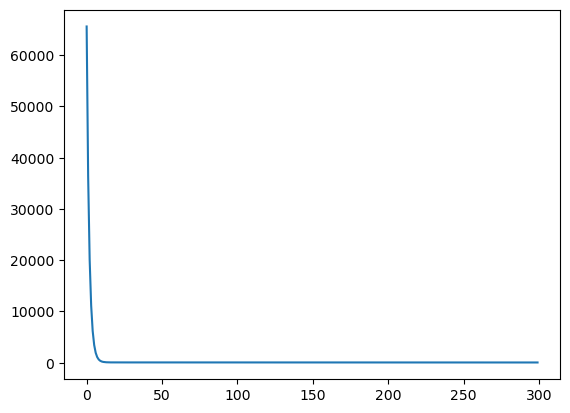

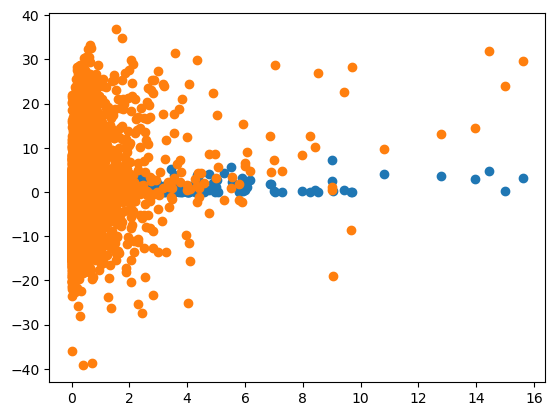

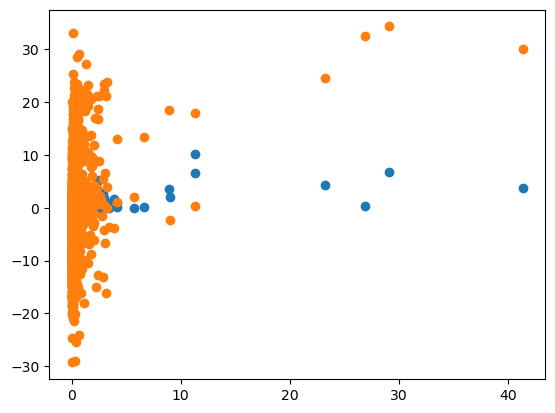

In [105]:
%matplotlib inline
start_time = time.time()
model = LinearRegressionGD(lr = 0.000001, max_iter = 300, tol = 1e-6, intercept = True)
steps, errors = model.fit(x_train, Y_train)
print('Время обучения: ', time.time() - start_time)
print('Коэффициенты: ', model.a)
print('MSE train / test', model.MSE(x_train, Y_train), ' / ', model.MSE(x_test, Y_test))
print('MAE train / test', model.MAE(x_train, Y_train), ' / ', model.MAE(x_test, Y_test))
#print('MAPE train / test', model.MAPE(x_train, Y_train), ' / ', model.MAPE(x_test, Y_test))

plt.plot(steps, errors)
plt.show()

Y_pred = model.predict(x_train)
plt.scatter(x_train[:, 1], Y_train)
plt.scatter(x_train[:, 1], Y_pred)
plt.show()

Y_pred = model.predict(x_test)
plt.scatter(x_test[:, 1], Y_test)
plt.scatter(x_test[:, 1], Y_pred)
plt.show()

Задача - довести МАЕ до 0.13 = удовл.

довести МАЕ до менее чем 0.10 = отл.